#                                     Linear Regression Using Tensorflow

### Importing the necessary packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
logs_path = '/tmp/tensorflow_summary/logs'

### Importing The data

In [3]:
data = np.transpose(np.loadtxt("machine-learning-ex1\ex1\ex1data1.txt", delimiter=','))
print("Shape of data : ", data.shape)
data_x = np.hstack((np.ones((97,1)), data[0].reshape(97,1)))
data_y = data[1].reshape(97,1)
print("Input Sample : ",data_x[:5])
print("output Sample : ",data_y[:5])

Shape of data :  (2, 97)
Input Sample :  [[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]
output Sample :  [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


### Shuffling and Partitioning the data into train and test sets

In [4]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print("No of Training Sample : ", train_x.shape)

No of Training Sample :  (77, 2)


### Defining the tensorflow graph. Here I am providing Different optimizers like Gradient Descent, Adam, RMSprop to work with and the weights can also be intialised randomly or to zeros or ones.

In [5]:
input_ = tf.placeholder("float64",shape=(1,2), name='input')
output = tf.placeholder("float64",shape=(1,1), name='output')
weights = tf.Variable(np.random.randn(2).reshape((2,1)), "float64", shape=(2,1), name='Weights')
#weights = tf.Variable(np.ones((2,1)), "float64", shape=(2,1), name='Weights')
lr = tf.constant(0.01,"float64", name='Learning_rate')
with tf.name_scope('Model'):
    y_pred = tf.matmul(input_, weights)
with tf.name_scope('Loss'):
    loss = tf.reduce_sum(abs(output-y_pred))
with tf.name_scope('opt'):
    #opt = tf.train.GradientDescentOptimizer(lr).minimize(loss)
    opt = tf.train.AdamOptimizer(lr).minimize(loss)
    #opt = tf.train.RMSPropOptimizer(lr).minimize(loss)

### Running The tensorflow Graph

In [6]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    i = 0
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    weights_ = weights.eval()
    while i<500:
        res_loss = 0
        for x,y in zip(train_x,train_y):
            sess.run(opt,feed_dict = {input_:[x], output:[y]})
            res_loss += loss.eval(feed_dict = {input_:[x], output:[y]})/train_x.shape[0]
        i = i+1
        if (i%100 == 0):
                print("Loss at iteration ", i, " : ", res_loss)
        res_weights = weights.eval()
        weights_ = res_weights
    test_pred=[]
    for x in zip(test_x):
        test_pred.append((sess.run(y_pred,feed_dict = {input_:x})).reshape(1,))
    final_weights = weights.eval()
print("Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_summary " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

W0910 19:29:31.480913  1356 meta_graph.py:449] Issue encountered when serializing trainable_variables.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'float64' has type str, but expected one of: int, long, bool
W0910 19:29:31.550556  1356 meta_graph.py:449] Issue encountered when serializing variables.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'float64' has type str, but expected one of: int, long, bool


Loss at iteration  100  :  2.0803519640802106
Loss at iteration  200  :  2.057230119794794
Loss at iteration  300  :  2.0712491983151553
Loss at iteration  400  :  2.0572968222416743
Loss at iteration  500  :  2.0567506766384764
Run the command line:
--> tensorboard --logdir=/tmp/tensorflow_summary 
Then open http://0.0.0.0:6006/ into your web browser


In [7]:
print("Average Loss on test data: ",np.sum(test_y-test_pred)/test_y.shape[0])

Average Loss on test data:  1.1470857485474872


### Plotting The data

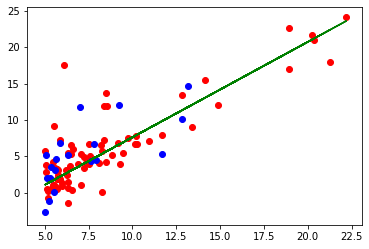

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(train_x.T[1], train_y, c='r')
plt.scatter(test_x.T[1], test_y, c='b')
plt.plot(data[0].reshape(97,1), np.dot(data_x, final_weights), c='g')